In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
x_train = pd.read_csv('X_train_NHkHMNU.csv')
y_train = pd.read_csv('y_train_ZAN5mwg.csv')
x_test =  pd.read_csv('X_test_final.csv')

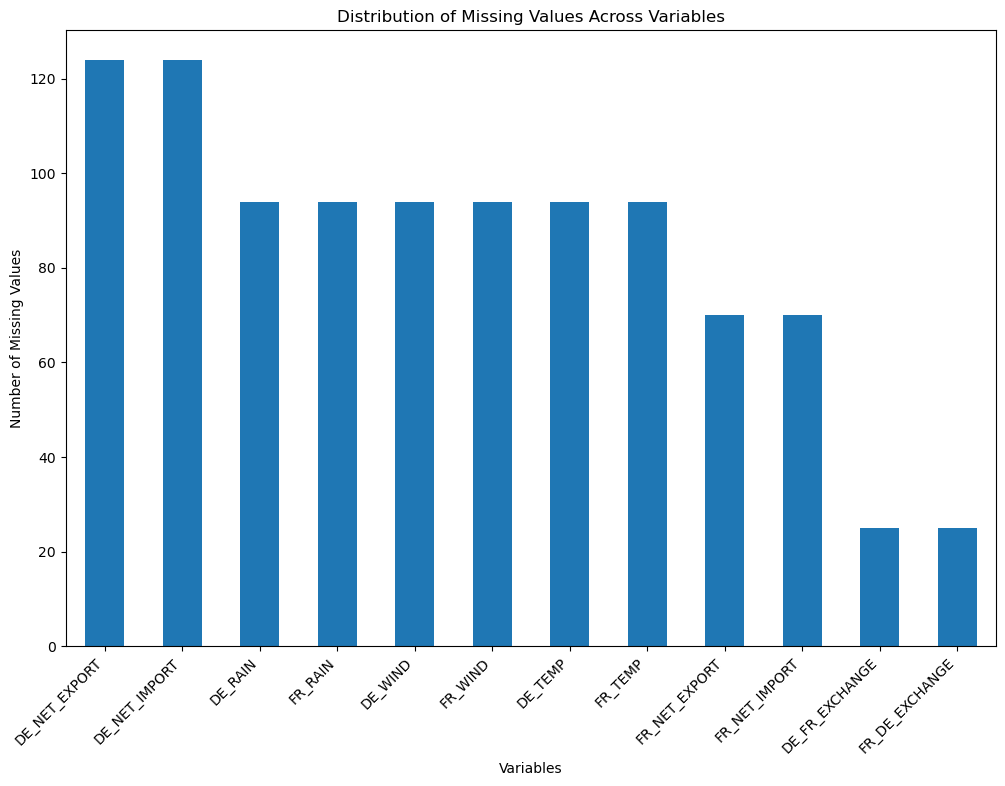

In [2]:
# Calculating the number of missing values per column
missing_values = x_train.isnull().sum()

# Filtering out columns with no missing values to focus on those with missing values
missing_values = missing_values[missing_values > 0]

# Plotting
plt.figure(figsize=(12, 8))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Missing Values Across Variables')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')

plt.show()


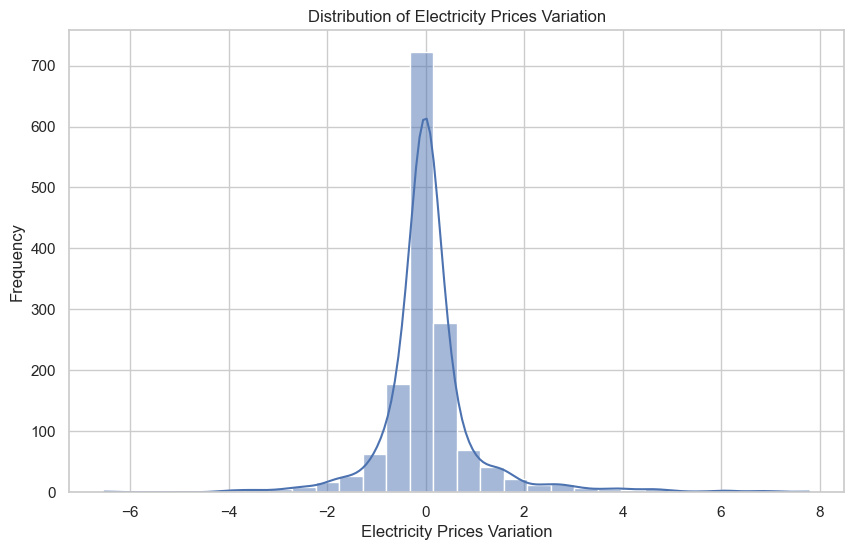

In [3]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histogram for the distribution of electricity prices (TARGET)
plt.figure(figsize=(10, 6))
sns.histplot(y_train['TARGET'], bins=30, kde=True)
plt.title('Distribution of Electricity Prices Variation')
plt.xlabel('Electricity Prices Variation')
plt.ylabel('Frequency')

plt.show()


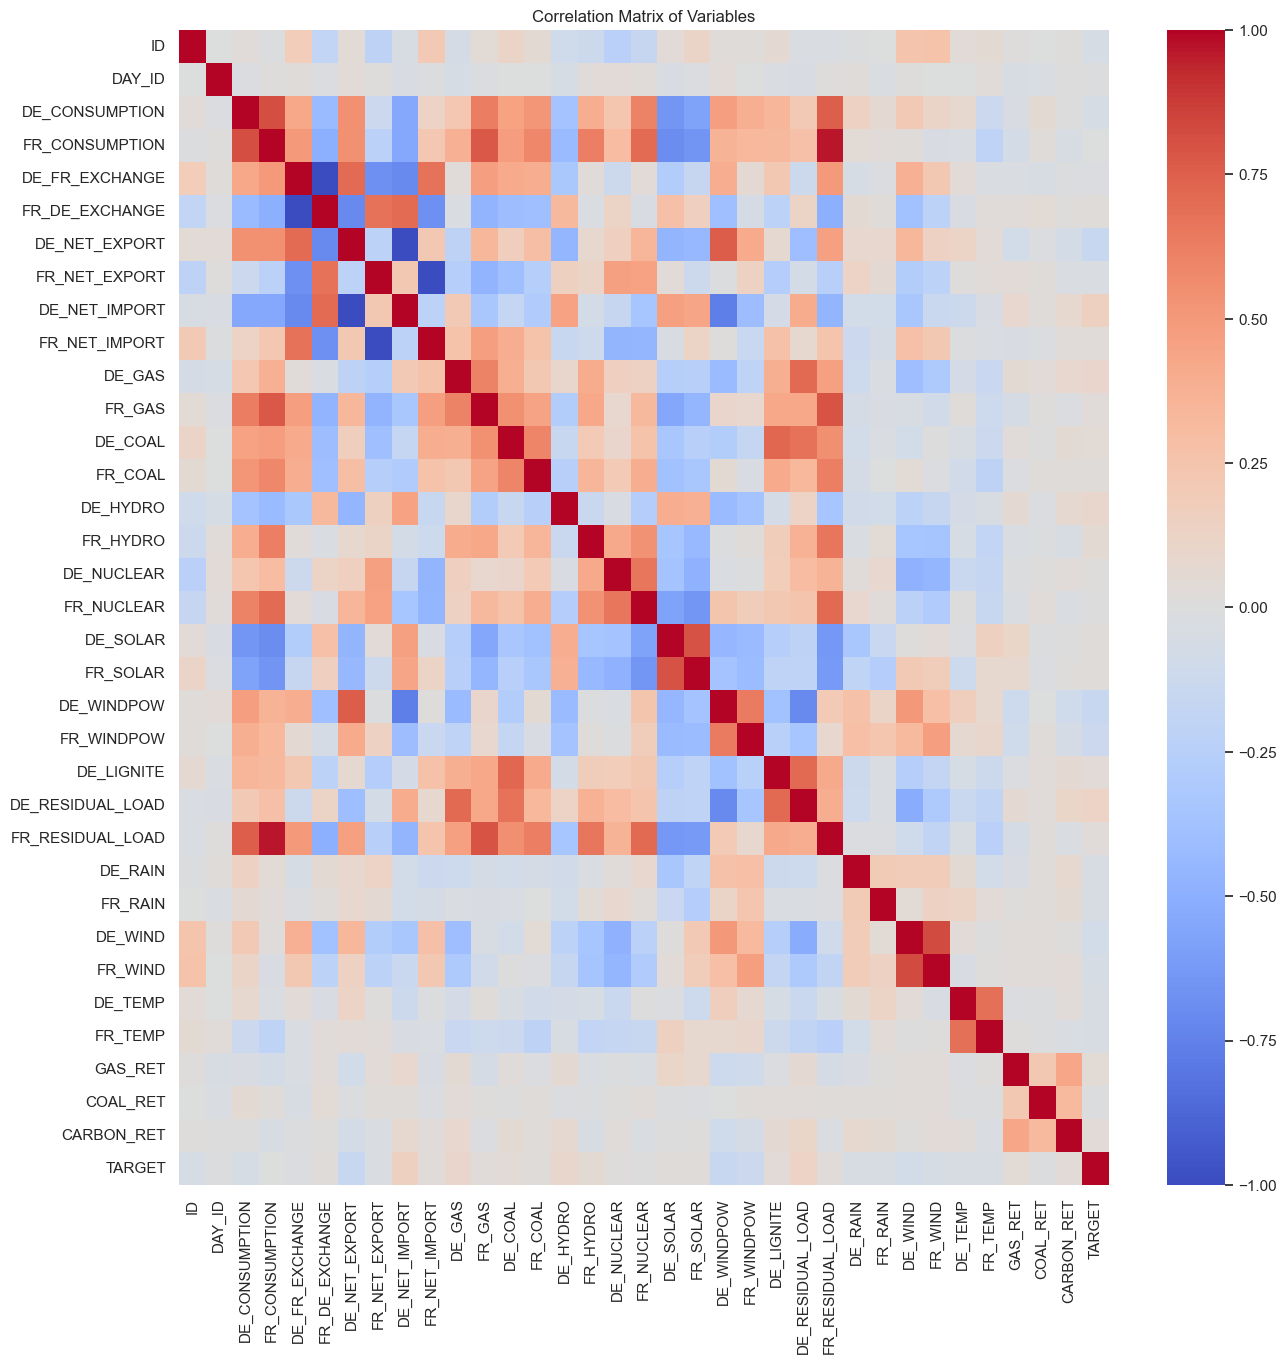

TARGET              1.000000
DE_NET_EXPORT      -0.154301
DE_NET_IMPORT       0.154301
DE_WINDPOW         -0.150287
DE_RESIDUAL_LOAD    0.132555
FR_WINDPOW         -0.132523
DE_GAS              0.096657
DE_HYDRO            0.086127
DE_WIND            -0.084127
FR_HYDRO            0.052820
DE_CONSUMPTION     -0.052565
FR_WIND            -0.050216
ID                 -0.048030
FR_TEMP            -0.046516
DE_COAL             0.045181
DE_TEMP            -0.044189
GAS_RET             0.041969
FR_RAIN            -0.040926
DE_RAIN            -0.040206
CARBON_RET          0.038252
DE_LIGNITE          0.034433
FR_RESIDUAL_LOAD    0.030254
FR_NET_IMPORT       0.025213
FR_NET_EXPORT      -0.025213
FR_GAS              0.024652
DE_SOLAR            0.021934
FR_SOLAR            0.021081
FR_DE_EXCHANGE      0.020330
DE_FR_EXCHANGE     -0.020330
FR_COAL             0.015732
DE_NUCLEAR          0.012236
DAY_ID             -0.011612
COAL_RET           -0.010285
FR_CONSUMPTION     -0.005685
FR_NUCLEAR    

In [5]:
# First, ensure data_merged is created by merging x_train with y_train
data_merged = pd.merge(x_train, y_train, on='ID')

# Exclude non-numeric columns from data_merged for correlation analysis
numeric_columns = data_merged.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix for numeric columns only
correlation_matrix = data_merged[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')

plt.show()

# Extracting correlation of features with the target variable for detailed insights
target_correlation = correlation_matrix['TARGET'].sort_values(key=abs, ascending=False)
target_correlation